# Pymaceuticals Inc.
---

### Analysis

- Ramicane appears to be the most effective of the 4 options.

- There is a strong correlation between mouse weight and tumor volume.

- Infubinol is the only drug to show any outliers
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='right')

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [21]:
# Checking the number of mice.
num_mice = combined["Mouse ID"].nunique()
num_mice

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined.loc[combined["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined[combined['Mouse ID'].isin(dup_mice_ID)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).mean()
median = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).median()
var = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).var()
std = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).std()
sem = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summaryagg =  clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryagg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

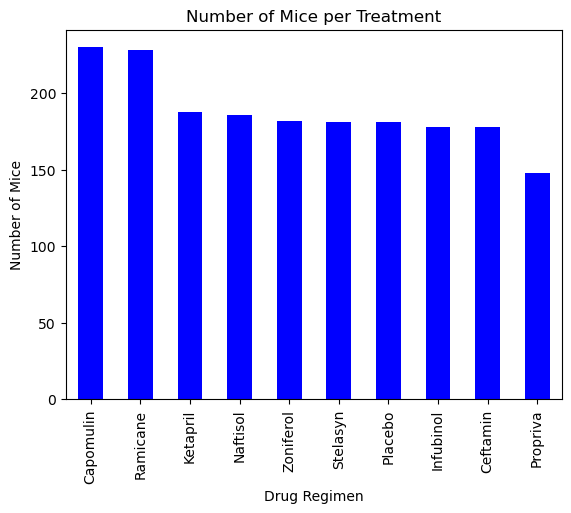

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

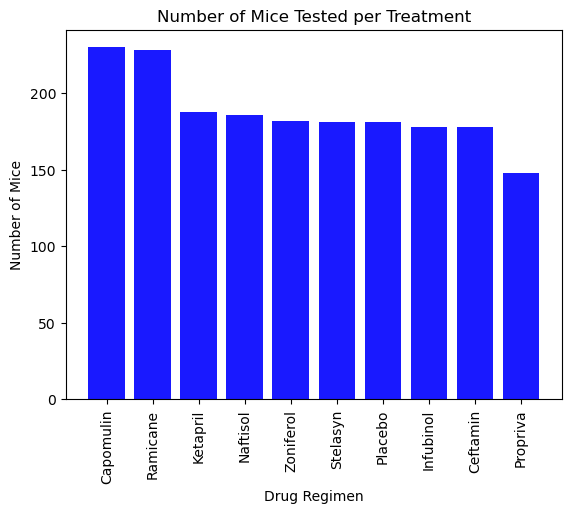

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.9, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

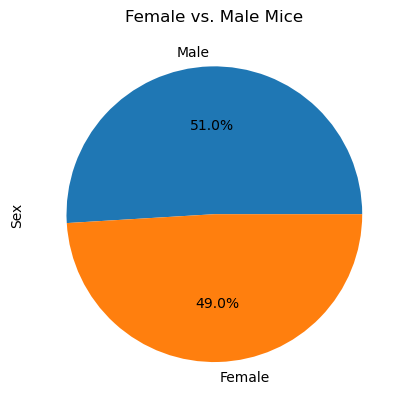

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

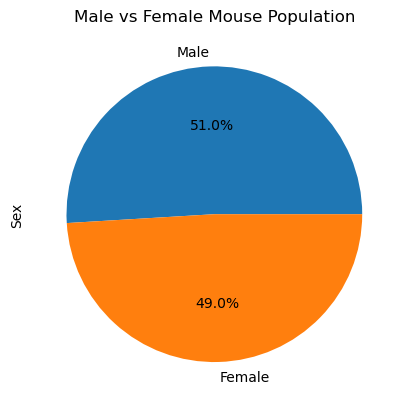

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piePlot=clean.groupby(["Sex"])["Mouse ID"].count().reset_index(name="Count of Mouse ID")
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Top4=clean.loc[(clean["Drug Regimen"]=="Capomulin")|(clean["Drug Regimen"]=="Ramicane")|(clean["Drug Regimen"]=="Infubinol")|(clean["Drug Regimen"]=="Ceftamin") ,:]
# Start by getting the last (greatest) timepoint for each mouse
Top4=Top4.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Top4=pd.merge(Top4,clean[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
Top4


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[] for i in range(4)]
for i in range(100):
    DR=Top4.iloc[i,:]["Drug Regimen"]
    Tum=Top4.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if DR==Treatments[j]:
            Tumors[j].append(Tum)
            continue

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]

for Num,Treatment in enumerate(Treatments):
    quartiles[Num] = Top4.loc[Top4["Drug Regimen"]==Treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[Num] = quartiles[Num][0.25]
    upperq[Num] = quartiles[Num][0.75]
    iqr[Num] = upperq[Num]-lowerq[Num]

    print(f"The lower quartile of {Treatment} tumor volume is: {lowerq[Num]}")
    print(f"The upper quartile of {Treatment} tumor volume is: {upperq[Num]}")
    print(f"The interquartile range of {Treatment} tumor volume is: {iqr[Num]}")
    print(f"The the median of {Treatment} tumor volume is: {quartiles[Num][0.5]} ")

    lower_bound[Num] = lowerq[Num] - (1.5*iqr[Num])
    upper_bound[Num] = upperq[Num] + (1.5*iqr[Num])
    print(f"Values below {lower_bound[Num]} could be outliers.")
    print(f"Values above {upper_bound[Num]} could be outliers.")

    #Printing any potential outliers
    for Tumor in Tumors[Num]:
        if Tumor>upper_bound[Num] or Tumor < lower_bound[Num]:
            potential_outliers[Num].append(Tumor)
    if len(potential_outliers[Num])>0:
        print(f"The the potential outliers for {Treatment} are: {potential_outliers[Num]}\n")
    else:
        print(f"There are no potential outliers for {Treatment}.\n")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infub

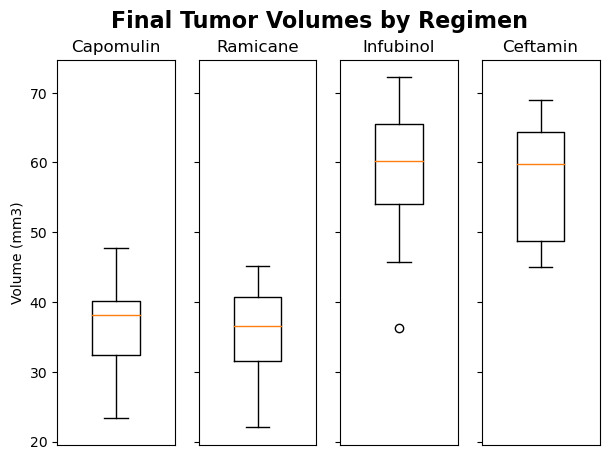

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(7,5))
fig.suptitle("Final Tumor Volumes by Regimen", fontsize=16, fontweight="bold")

ax1.set_ylabel('Volume (mm3)')
ax1.set_title(Treatments[0])
ax1.boxplot(Tumors[0], widths=0.4)
ax1.set_xticks([])

ax2.set_title(Treatments[1])
ax2.boxplot(Tumors[1], widths=0.4)
ax2.set_xticks([])

ax3.set_title(Treatments[2])
ax3.boxplot(Tumors[2], widths=0.4)
ax3.set_xticks([])

ax4.set_title(Treatments[3])
ax4.boxplot(Tumors[3], widths=0.4)
ax4.set_xticks([])

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

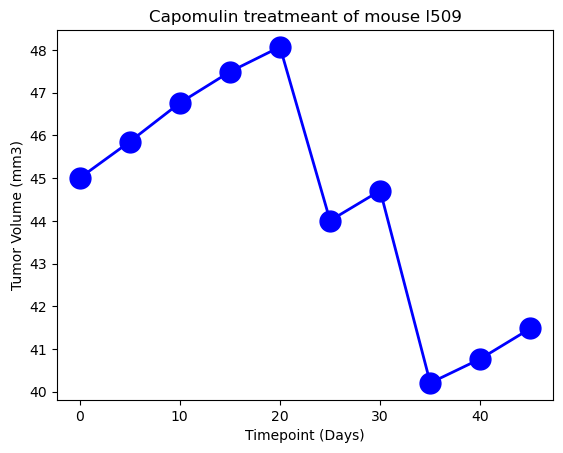

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

C:\Users\Richards\AppData\Local\Temp\ipykernel_27564\3631157307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

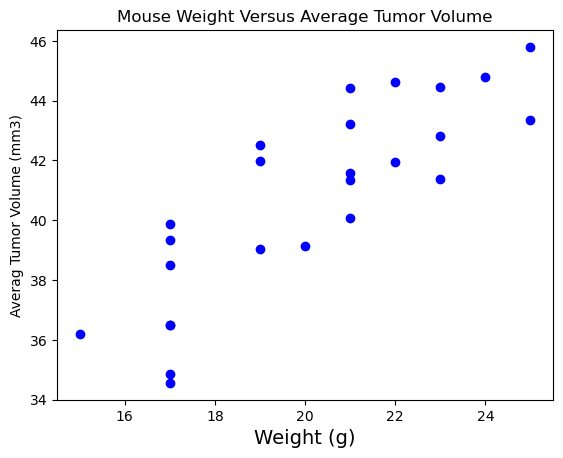

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The r-squared is: 0.709


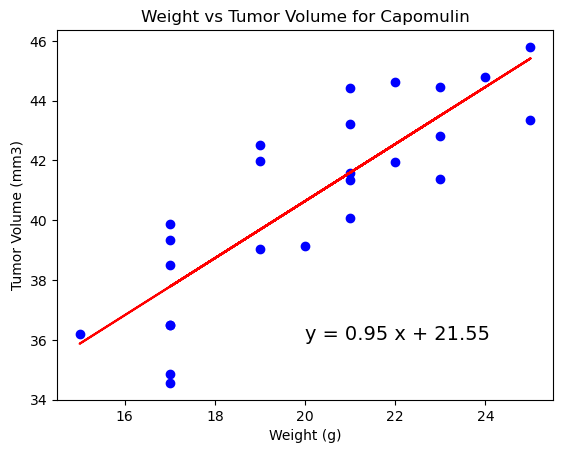

The correlation between mouse weight and the average tumor volume is 0.84


In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")